<a href="https://colab.research.google.com/github/pooja251096/airbnb_booking_analysis/blob/main/Airbnb_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

# **1. The Dataset**

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values

After collecting the data, it is equally important to understand which variables or features can help us in our analysis and predictions. Even though it may look like an elementary step but it is one of the most tedious and important tasks. So looking at our data and based on the problem, the following variables can be taken.
1. Host Id
2. neighbourhood_group
3. neighbourhood
4. room_type
5. minimum_nights
6. number_of_reviews
7. price

Some other variables might be taken but these are the important ones for understanding the data. 

In [1]:
# importing necessary libraries

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px

import plotly.offline as pyo
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

Some elementary data inspection

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/Almabetter learning/pandas data/Airbnb Eda project data/Airbnb NYC 2019.csv"

In [8]:
# loading data

df=pd.read_csv(path)

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [9]:
# retrieving all column names

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### **2. Understanding, Wrangling and Cleaning Data**

In [10]:
# inspecting dataset for null values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Dropping columns which are not relevant to our analysis, ID can be removed as it would be unique for every rows. Similarly NAME can be dropped as showing host names in our analysis can expose sensitive data. LAST_REVIEW can also be dropped as it is not much significant

In [11]:
# cleaning data by removing unnecessary columns/fields
df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)


In [12]:
# inspecting data randomly after the removal of unnecessary columns
df.sample(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25476,46736568,Manhattan,Gramercy,40.73594,-73.97947,Entire home/apt,170,3,12,0.53,1,1
16971,77365697,Manhattan,Chelsea,40.74032,-74.00265,Entire home/apt,110,4,6,0.16,1,0
41789,244082709,Queens,Springfield Gardens,40.65970,-73.76993,Private room,65,1,14,3.23,7,177


Records for which the REVIEWS_PER_MONTH value is null, we can fill with zero for elementary analysis, assuming no review were given.

In [13]:
# replacing null values of 'reviews_per_month' with zeros

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

After handling the missing values, we do a further check to confirm no null values

In [14]:
# confirming that there are non null values in our dataset

df.isna().sum().sum()

0

Let's begin looking into our data by inspecting some interesting categorical unique values 

In [15]:
# checking for unique neighbourhood groups 
print("\n".join(df.neighbourhood_group.unique()))

Brooklyn
Manhattan
Queens
Staten Island
Bronx


We can see there are five neighbourhood groups into which all the localities have been divided.

We further check the number of unique neighbourhoods.

In [16]:
# checking for sum of unique iterations in 'neighbourhood' field/ column 
print(len(df.neighbourhood.unique()))

221


Let's check the type of rooms available in the listings.

In [17]:
# checking for unique values in 'room_type' field/ column 
print("\n".join(df.room_type.unique()))

Private room
Entire home/apt
Shared room


Now we are equipped with the information on the neighbourhood groups and the type of rooms available.

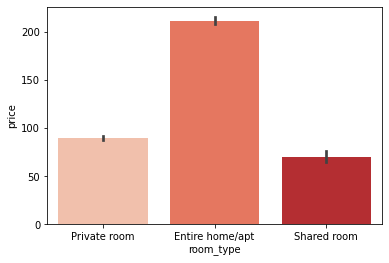

In [18]:
viz_price_room_type = sns.barplot(x='room_type', y='price', data= df, palette='Reds')
viz_price_room_type

**Exploring and Visualizing Data**

we are now ready to explore the data statistically and to visualize the values of features and correlations between different features.

In [19]:
#descriptive statistics on Airbnb prices
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

*The price data is heavily right skewed. We can deduce from our price desciption stats that there are huge number of outliers as the price at 75 percentile is 175 dollars but the max price is 10000 dollars. We would be needing some outlier treatments when we analyze our prices with different features.*

In [20]:
print("The 98th percentile price is {}.".format(np.percentile(df['price'],98)))

The 98th percentile price is 550.0.


*Going forward we can analyze the prices using this 98th percentile value. Some percentile higher than the percentage covered by two standard distribution of a Normal distribution*

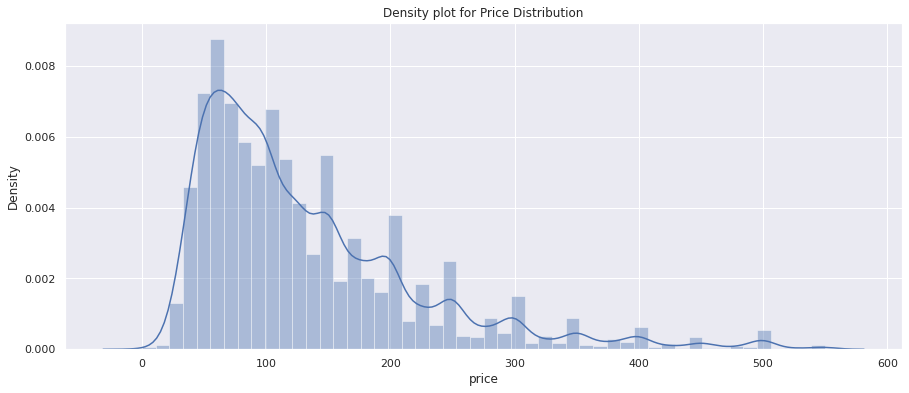

In [21]:
sns.set(rc={'figure.figsize':(15,6)})
price_dist=sns.distplot(df[df['price']<=np.percentile(df['price'],98)].price)
price_dist.set_title("Density plot for Price Distribution");

*Now we get good enough distribution plot for our price.*

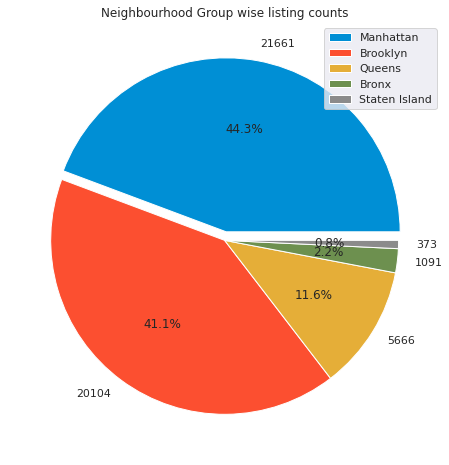

In [22]:
#Visualize the proportion of the listing count on each region area using the ‘neighbourhood_group’ columns

neighbourhood_group_counts=df.neighbourhood_group.value_counts()
group_names = neighbourhood_group_counts.index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.05,0,0,0,0)
group_counts = neighbourhood_group_counts.values

plt.figure(figsize=(8,8))
plt.pie(group_counts, explode = explode, labels=group_counts, colors= colors, autopct = '%1.1f%%', startangle=0,)
plt.legend(group_names)
plt.title('Neighbourhood Group wise listing counts')
plt.show()

*Firstly, we can check the distribution of listings across different neighbourhoods. We can see a nice pie-chart depicting the counts as well as the percentages of listings. It is very well evident that Manhattan has the most number of listings followed by Brooklyn.*

# **Analyzing the prices across neighbourhoods**

We may know how likely the price of Airbnb be around its mean value using its violin plot

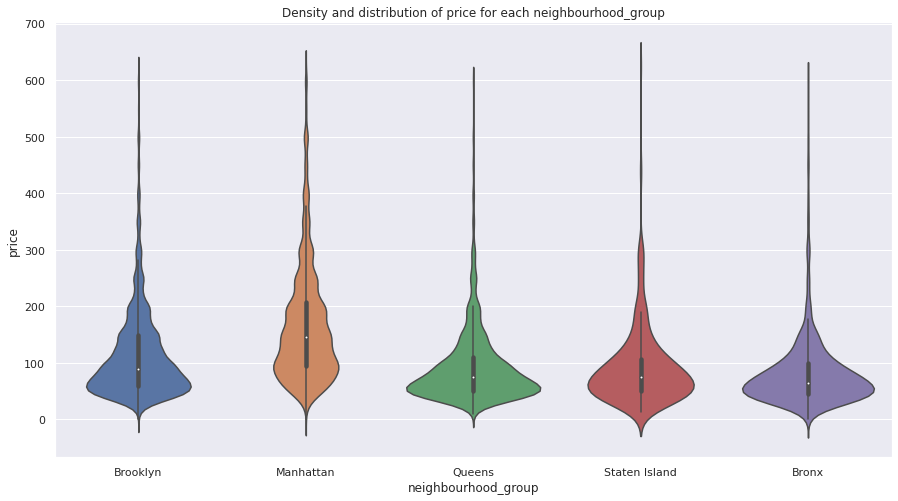

In [23]:
# Let us now see the density and distribution of 'price' for different-
#-'neighbourhood_group's using violin plot
sns.set(rc={'figure.figsize':(15,8)})
viz_neigh_grp_price = sns.violinplot(data=df[df.price < 630], 
                                     x='neighbourhood_group', y='price')
viz_neigh_grp_price.set_title('Density and distribution of price for each neighbourhood_group');

*As seen in the Violin plot, from the price distribution across diffrent neighbourhoods median price would be a better estimate for comparisons. The mean value would be influenced by the outliers.*

In [24]:
# Let's discover the relationship between the 'neighbourhood_group's and 'price'
df[df.price < 550].pivot_table(index='neighbourhood_group',values='price',aggfunc='median').sort_values('price',ascending=False).reset_index()

,neighbourhood_group,price
0,Manhattan,145
1,Brooklyn,90
2,Queens,75
3,Staten Island,75
4,Bronx,65


*Price value of 550 is the 98th perecntile value that we calculated earlier.*

*The median price of Airbnb in Brooklyn: 90,  Manhattan: 145. We can notice that the average price of Airbnb is higher in Manhattan followed by that of Brooklyn,the reason for this can be inspected.*

In [25]:
# let us now plot all the Airbnbs on a map, to check demographical influence
# on price and on other parameters


viz_Airbnb_map = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                                   color="neighbourhood_group",
                                   color_discrete_map={
                                                      'Bronx': '#222A2A', 
                                                      'Brooklyn': '#2E91E5', 
                                                      'Manhattan': '#FC0080',
                                                      'Queens': '#750D86',  
                                                      'Staten Island': '#0000EE'
                                                      }, zoom=10, height=780, 
                                                      width =1000)
viz_Airbnb_map.update_layout(mapbox_style="open-street-map")
viz_Airbnb_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
viz_Airbnb_map.show()

If we observe that the Airbnbs are considerably more in number in 'neighbourhood_group's 'Manhattan' and 'Brooklyn' which defines the higher demand of Airbnbs in those 'neighbourhood_group', from this we can assess that they attract maximum tourists.
Moreover,we can even assess that the average price of Airbnb in those 'neighbourhood_group's higher in comparision to that of in other 'neighbourhood_group's due to its high demand.

# **Airbnb distribution across all neighbourhoods**

In [26]:
#finding top 10 'neighbourhood's
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

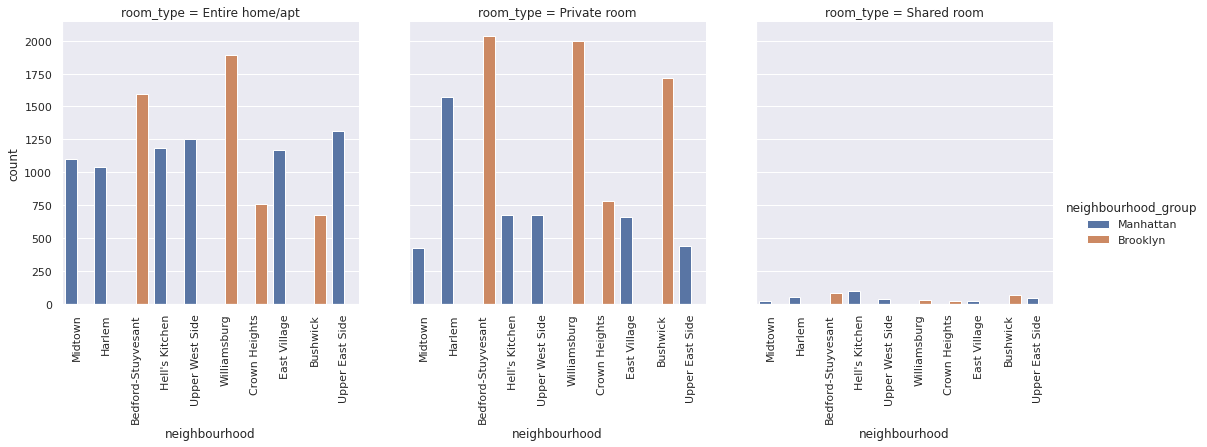

In [27]:
sns.set(rc={'figure.figsize':(20,8)})
df_top_neighbourhood=df[df['neighbourhood'].isin(df.neighbourhood.value_counts().head(10).index)]                                                       
viz_neighbourhood_room_type = sns.catplot(x='neighbourhood',
                                          hue='neighbourhood_group',
                                          col='room_type',
                                          data=df_top_neighbourhood,
                                          kind='count')
viz_neighbourhood_room_type.set_xticklabels(rotation=90)                                                 

Let us take some useful inferences from above plot

Popular neighbourhoods where the density of **Entire home/apt are more** than that of Private rooms

*   Midtown
*   Hell's Kitchen
*   Upper West Side 
*   East Village
*   Upper East Side

Popular neighbourhoods where the density of **Private rooms are more** than that of Entire home/apt 

*   Harlem
*   Bedford-Stuyvesant
*   Williamsburg
*   Crown Heights
*   Bushwick

In case, if the **search is for Shared rooms** the following neighbourhoods can be considered

*   Bedford-Stuyvesant
*   Hell's Kitchen
*   Bushwick



## **Identifying the Hosts with most number of listings and their listed areas**

In this section, we would be analyzing the listing patterns of the hosts who have most number of listings. It would be good to find the areas in which they list mostly and the room types they provide as service.

In [28]:
# calculate the number of listings each host has
host_listing_counts=pd.DataFrame(df['host_id'].value_counts().reset_index())
host_listing_counts['host_id'].describe()

count    37457.000000
mean         1.305363
std          2.760747
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: host_id, dtype: float64

*The descriptive stats give us an idea that most hosts have few number of Airbnb listings. The maximum number of listings is 327. We can take the hosts whose listing counts come within top 0.1% to analyze where and what type of rooms they listed.*

In [29]:
# Calculatiing the 99.9 percentile for the listing count values
print("The 99.9 percentile value for the listing counts is {:.2f}.".format(np.percentile(host_listing_counts['host_id'],99.9)))
print("Number of hosts with listings more than 20 are {}.".format(df[df['calculated_host_listings_count']>=20]['host_id'].nunique()))

The 99.9 percentile value for the listing counts is 20.54.
Number of hosts with listings more than 20 are 40.


*The value of 20.54 can be taken as 20 to indicate 20 listings for individual hosts. We can proceed taking those hosts who have atleast 20 listings. It can be observed that there are 40 hosts with such listings.*

These are the 40 hosts with atleast 20 listings. The top 5 to 10 might be the most busiest.  My analysis would be on these hosts.

This is a small fraction of hosts to analyze. But rest of the hosts have few listings only, this might not help us in giving good analysis or prediction.

In [30]:
top_host_df=df[['host_id']].value_counts().sort_values(ascending=False).head(40).reset_index().rename(columns={0:'listing_count'})
top_host_df.head()

,host_id,listing_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


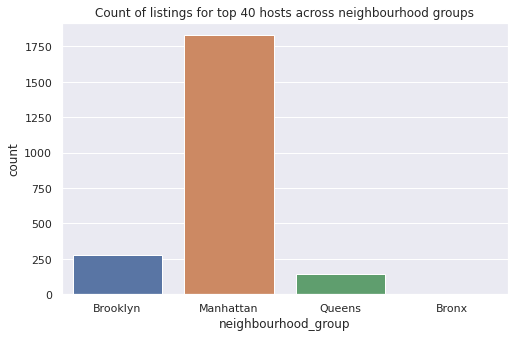

In [31]:
sns.set(rc={'figure.figsize':(8,5)})
plot_neigh_grp_wise_count=sns.countplot(data=df[df['host_id'].isin(top_host_df.host_id)],x='neighbourhood_group')
plot_neigh_grp_wise_count.set_title("Count of listings for top 40 hosts across neighbourhood groups");

*We had previously found that the number of listings in Manhattan and Brooklyn is quite comparable. In addition to that, it is evident from this plot that the top hosts majorly have their listings in Manhattan.*

In [32]:
# Percentage wise distribution of listings across neighbourhood groups for top hosts
df_top_host_prcrnt_dist_locality=df[df['host_id'].isin(top_host_df.host_id)].groupby(['host_id','neighbourhood_group']).agg({'price':['count']}).groupby(level=0).apply(lambda x:round(100 * x / x.sum())).reset_index()
#df_top_host_prcrnt_dist_locality.head(5)



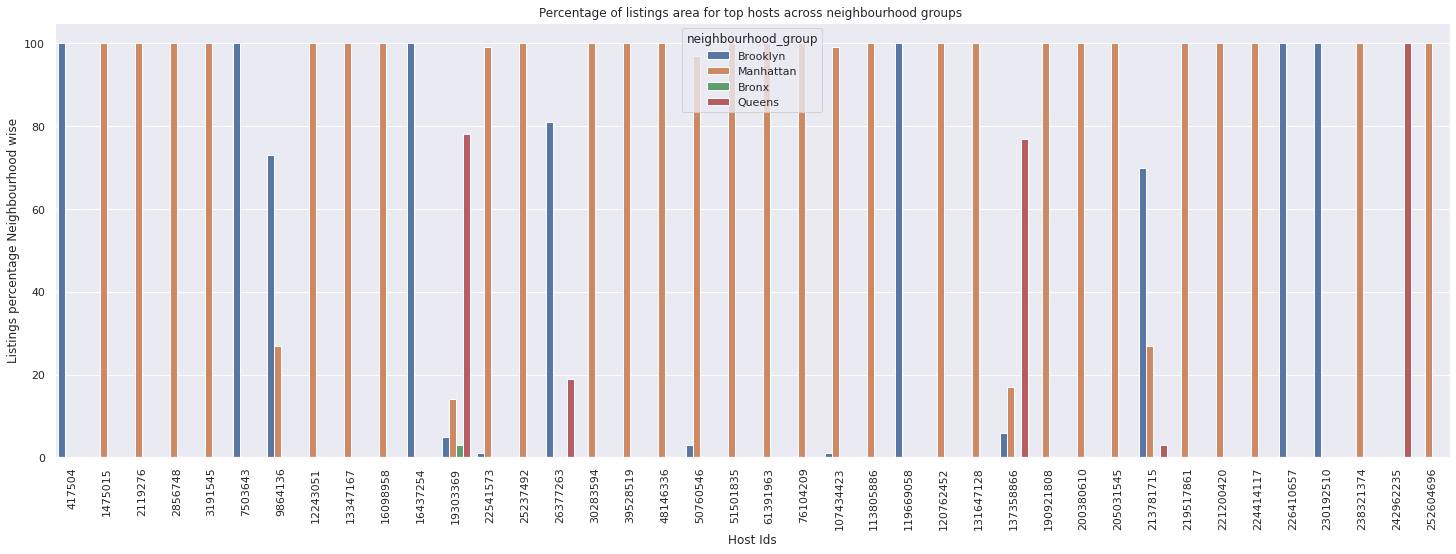

In [33]:
#The %age wise distribution of listings in diff areas has been plotted for the top hosts.

sns.set(rc={'figure.figsize':(25,8)})

top_host_listing_areawise_graph=sns.barplot(x='host_id',y=('price','count'),hue='neighbourhood_group',data=df_top_host_prcrnt_dist_locality)#
top_host_listing_areawise_graph.set_title("Percentage of listings area for top hosts across neighbourhood groups ")


top_host_listing_areawise_graph.set_xticklabels(labels=top_host_listing_areawise_graph.get_xticklabels(), rotation=90)
top_host_listing_areawise_graph.set_xlabel('Host Ids')
top_host_listing_areawise_graph.set_ylabel('Listings percentage Neighbourhood wise');

We can say that out of  top 40 hosts, most of them have their listings completely in Manhattan. The second in the top list of areas is Brooklyn. (None of them have apartment in Staten Island). We can further analyse about these two areas.

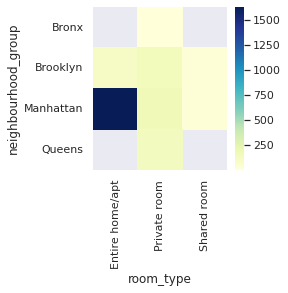

In [34]:
# Heatmap for top hosts across neighbourhood group and room type
plt.figure(figsize=(3,3))
top_host_count_neigh_wise=df[df['host_id'].isin(top_host_df.host_id)].pivot_table(index='neighbourhood_group',columns='room_type',values='host_id',aggfunc='count')
sns.heatmap(top_host_count_neigh_wise,cmap='YlGnBu')
plt.show()

*This heat map of count quite clearly depicts that majority of the listings of top hosts across different neighbourhoods is Entire home/apt.*

**Analysis about the room types across neighbourhood groups.**

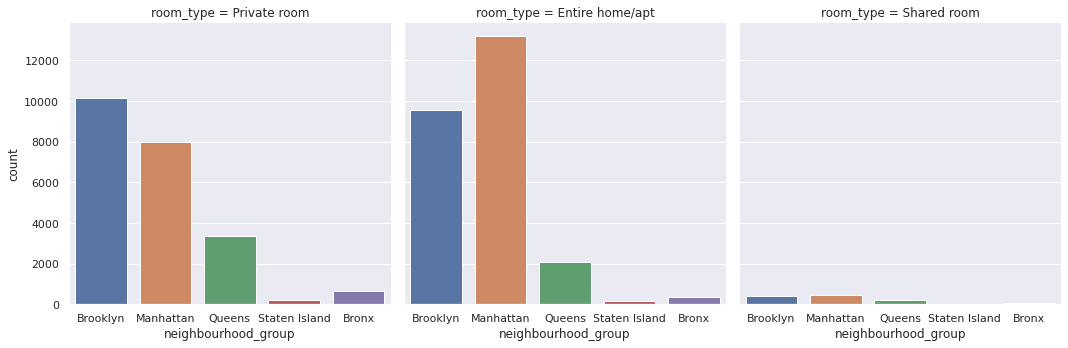

In [35]:
sns.set(rc={'figure.figsize':(20,10)})
plot_neigh_room_wise=sns.catplot(data=df,x='neighbourhood_group',kind='count',col='room_type');


From this plot it is evident that "Entire home" type is more popular in Manhattan and this might be the reason why top hosts have most of this type of listings. But interestig thing to note is that in Brooklyn Private rooms are more popular.

We can also check whether there is any pattern for room type distribution in different neighbourhoods in Manhattan 

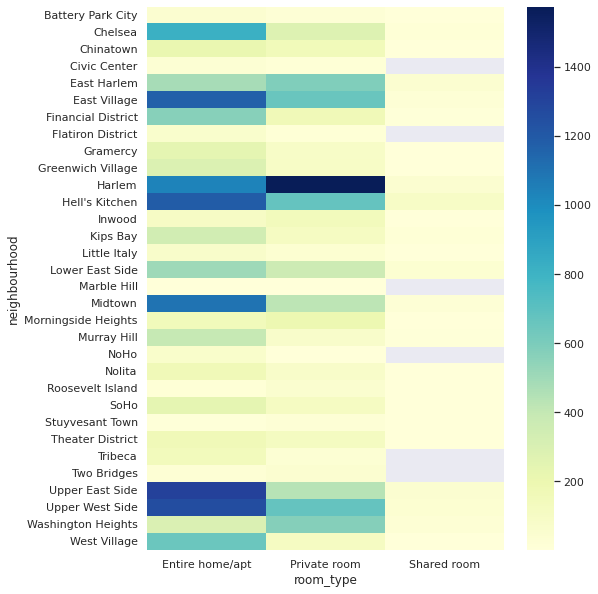

In [36]:
plt.figure(figsize=(8,10))
manhattan_pivoted_count=df[df.neighbourhood_group=='Manhattan'].pivot_table(index='neighbourhood',columns='room_type',values='host_id',aggfunc='count')
sns.heatmap(manhattan_pivoted_count,cmap='YlGnBu')
plt.show()

*From this heat map we can see that certain neighbourhoods in Manhattan like **East Village, Harlem, Hell's kitchen, Upper East Side and Upper West side** has huge number of Entire homes while only **Harlem** has high number of Private roooms. This further shows that people might be preferring Entire rooms compared to Private or Shared rooms in Manhattan. Rest of the neighbourhoods seems to have Entire homes and Private rooms almost equally distributed.So next time if someone visits Manhattan he can know where to find his preferred room.*

If we would like to go further on our analysis with Brooklyn then a similiar analysis can be done for Brooklyn also.

*These heatmap for Manhattan gives us an idea about the neighbourhood which are most popular since they are having higher number of rooms.*

# **Analysis based on reviews**

Grouping the records with neighbourhood group and number of reviews and
displaying the same in a bar graph would point us to neighbourhood groups which are mostly visited, as more reviews could mean more visits in those areas.  which shows the major reviews are also avilable in manhattan and brooklyn

In [37]:
df.nlargest(5, 'number_of_reviews')#[['number_of_reviews']]#.reset_index()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


These are the 5 highest reviewed listings

In [38]:
neigh_grp_reviews=df[['neighbourhood_group','number_of_reviews']]
neigh_grp_reviews=neigh_grp_reviews.groupby(by='neighbourhood_group')
airbnb_reviews=neigh_grp_reviews.sum().reset_index()
#airbnb_reviews

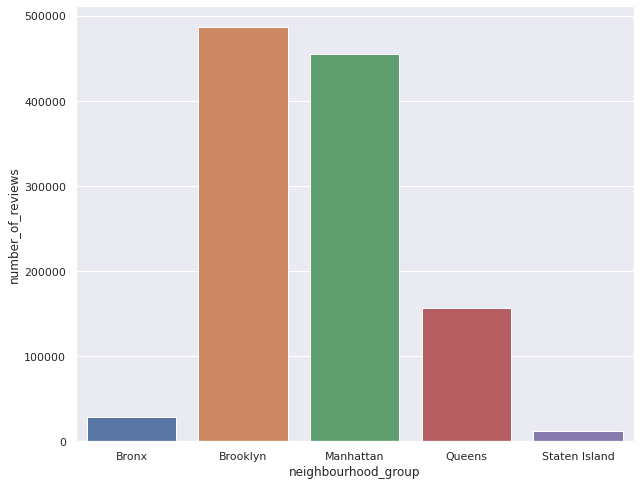

In [39]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data=airbnb_reviews,x='neighbourhood_group',y='number_of_reviews');

*By aggregating the reviews based on the neighbourhoods we can observe that Manhattan and Brooklyn has most number of reviews, further giving us an idea that these two are the most popular destinations.*

# **Information from minimum number of nights**

In [40]:
#descriptive summary for column minimum_nights
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

*The descriptive summary of the column MINIMUM_NIGHTS shows that most of the listings allow bookings for less than five nights. This can be know from the third quartile value. The maximum value is 1250 which doesn't makes sense as it would be more than 3 years. We need to do fix the outliers to do further analysis.*

In [41]:
# Calculate the 98th percentile of minimum_nights
print("The 98th percentile value for MINIMUM_NIGHTS is {:.0f}.".format(np.percentile(df['minimum_nights'],98)))

The 98th percentile value for MINIMUM_NIGHTS is 30.


*Using this value of 30 a histogram can be plotted to check the counts across individual values.*

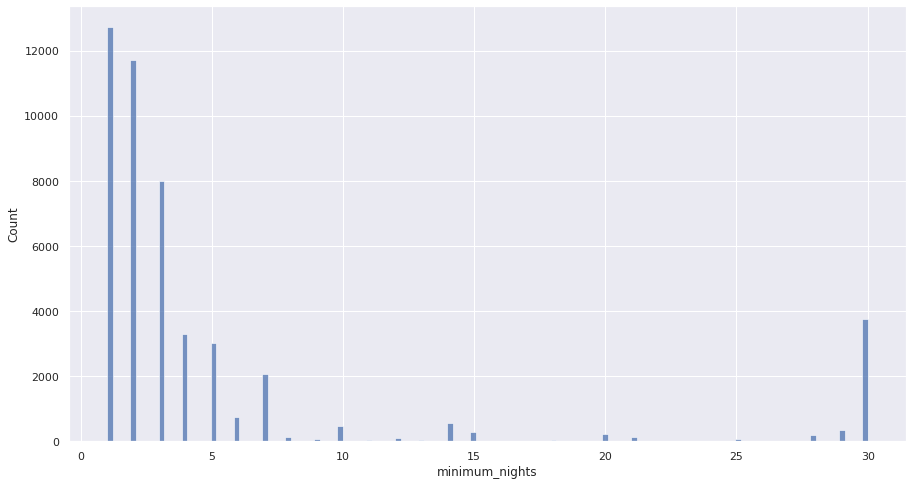

In [42]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(df[df['minimum_nights']<=30].minimum_nights);

*The Hitogram plot gives us a good understanding that mostly rooms are allow bookings for less than 15 nights. So, some further analysis on this can be done.*

For all listings with minimum nights less than 15, we divide into two groups 1 to 7 and 8 to 15, we analyze the median price distribution in diffrent neighborhoods.

In [43]:
df['minimum_nights_weekly']=df[(df['minimum_nights']<=15) & (df['price']<=550)]['minimum_nights'].apply(lambda x: 'Short stay' if x<=7 else 'Long Stay' )
df.pivot_table(index='neighbourhood_group',columns='minimum_nights_weekly',values='price',aggfunc=['median'])

median           
minimum_nights_weekly Long Stay Short stay
neighbourhood_group                       
Bronx                        59         65
Brooklyn                     79         93
Manhattan                   110        140
Queens                       70         75
Staten Island                50         75

*It can be said that price per day for a customer who books for eight to 15 days is lesser compared to bookings for 1 to 7 days. So customers bookings for more than a week untill a fortnight will bear lesser expenses.*

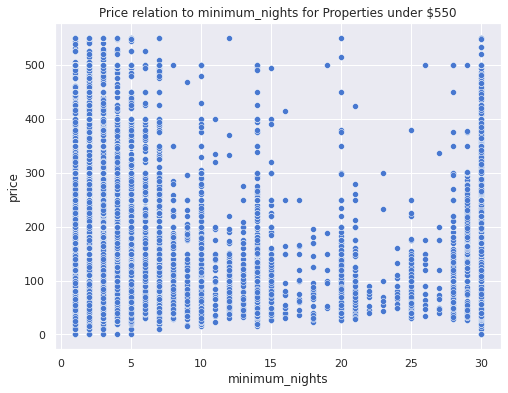

In [44]:
sns.set_palette("muted")
x = 'minimum_nights'
y = 'price'

title = 'Price relation to minimum_nights for Properties under $550'
data_filtered =df[(df['minimum_nights']<=30) & (df['price'] <= 550)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

*A scatter plot of the listings against price shows us that the first half the plot is more dense giving us an hint the wide range of price options available for different number of nights a customer books. But around 25 we can see a short range signifying that rooms that require 25 days to be booked have cheaper prices.*

# **3.Objective Analysis of data**

In addition to the understandings we had from the visual representation of our data, scientific analysis can be added to it to make it more relevant from Machine learning perspective.

So we plot a correlation matrix to analyze  the correlation among features. Values closer to one signifies strong correlation.

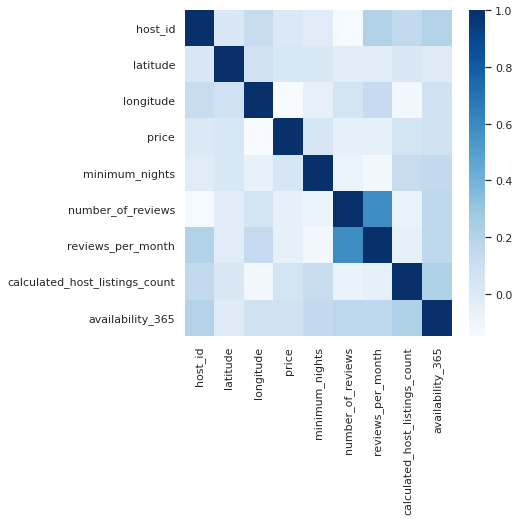

In [45]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),cmap="Blues");

We can see reviews per month and number of reviews are highly correlated. Either one of them can be taken when we fit our data to any Machine Learning models. The column calculated_host_listings_count can also be dropped as it only signifies the number of Airbnb listings a particular host has. This data can be easily calculated from the rows itself.

# **4.Conclusions**

So, basically in this notebook we did some exploratory data analysis, handled the missing values, treated the outliers and did one transformation to map category into some ordinal values. 

From our analysis it is evident that Mnahattan and Brooklyn are the neighbourhood groups with most number of Airbnb rooms. As well as, it can be seen that the room types mostly is either Entire home or Private rooms. Furthermore, with respect to prices it can be concluded that Manhattan has the highest median price followed by Brooklyn. We also saw how the number of reviews across neighbourhoods strengthen our findings that Manhattan and Brooklyn are most popular. In addition to this we also checked the price ranges available for bookings based on certain number of nights.

This analysis can be helpful for a new host who wants to enter into business with Airbnb. He can quickly conclude which areas are more in demand and the room types that are mostly preferred by customers allowing him to setup his business in these particular aspects only. It can also benefit existing hosts to understand profitable neighbourhoods.
This analysis would also help someone visiting New York, giving him an idea about the price range for different room types across neighbourhoods. He can choose based on his requirements and also the demographic analysis can help him choose localities which would be convinient for him.

For future works this data can be used to fit a Machine Learning regression model and predict the prices of Airbnb listings.